# Objectives

##### Statistical Analysis of Business Data. Explore the dataset and extract insights from the data.

1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Prove(or disprove) that the medical claims made by the people who smoke is greater than those who don't?
3.	Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4.	Is the proportion of smokers significantly different across different regions?
5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.


# Overview
1. Import data and perform data profiling
2. Data preprocessing 
    1. Check missing data
    2. Data transformation
    3. Outlier
3. EDA
    1. Univariate Analysis
    2. Bi-Variate Analysis
4. Statistical Analysis
    1. two-sample t-test
    2. Anova
    3. Chi-squared test

# Data Information

| Column Name | Description | Data Type|
| :- | :- | :- |
| Age | This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government). | Nominal |
| Sex| This is the policy holder's gender, either male or female. | Categorical |
| BMI | This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9. | Ordinal |
| Children | This is an integer indicating the number of children / dependents covered by the insurance plan.   | Nominal |
| Smoker | This is yes or no depending on whether the insured regularly smokes tobacco. | Categorical |
| Region | This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.  | Categorical |
| Charges| Individual medical costs billed by health insurance  | Continuous |


## 1. Import data and perform data profiling

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the csv file
df=pd.read_csv('Axisinsurance.csv')

In [3]:
# check the first 5 rows the the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# check how many columns and rows 
df.shape

(1338, 7)

In [5]:
# check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## 2. Data preprocessing

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Check the numerical data type¶

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


** Observations: **
1. The mean and median of age, bmi and children variables are similar. They have normal distributions.
2. The mean of charges amount is a lot higher than the median which means that only few customers claim the higher bills.

In [8]:
# convert the data type
df['sex'] = df.sex.astype('category')
df['children'] = df.children.astype('int64')
df['children_cat'] = df.children.astype('category') # create a new column with children as the categorical data type
df['smoker'] = df.smoker.astype('category')
df['region'] = df.region.astype('category')

### Check the catogorical data type

In [9]:
df.describe(include=["category"])

,sex,smoker,region,children_cat
count,1338,1338,1338,1338
unique,2,2,4,6
top,male,no,southeast,0
freq,676,1064,364,574


** Observations: **
1. The customers have both male and females, smoker and non-smoker.
2. There are many customers in the southeast of US.
3. There are many cusomters have no depedent in the health insurance plan.

## 3. EDA

### Univariate - numerical

In [10]:
def histogram_boxplot(feature, figsize=(8,6), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='blue') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

/Users/shuhsienwu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


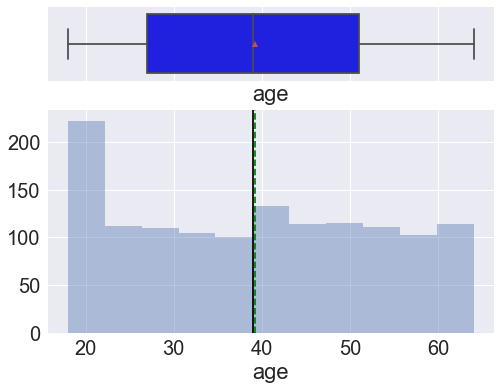

In [11]:
histogram_boxplot(df["age"])

** Obversations: **
1. No outlier for age

/Users/shuhsienwu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


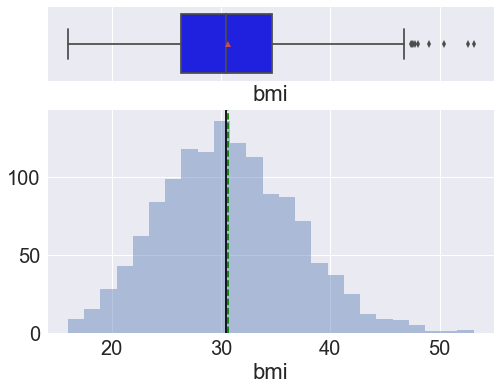

In [12]:
histogram_boxplot(df["bmi"])

** Obversations: **
1. BMI is normal distribution
2. There are outlier for BMI. Some people has very high BMI

/Users/shuhsienwu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


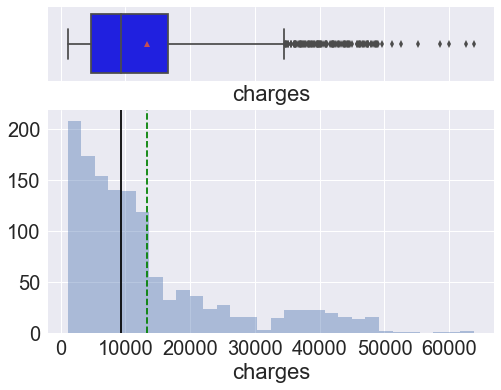

In [13]:
histogram_boxplot(df["charges"])

** Obversations: **
1. Charges is skew to the right
2. There are outlier for charges. Some people have very high medical charges

### Univariate - categorical

In [14]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
    plt.show() # show the plot

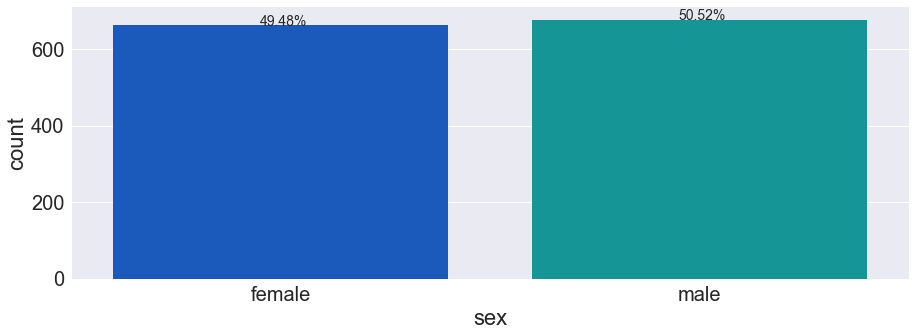

In [15]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["sex"],palette='winter')
perc_on_bar(ax,df["sex"])

** Obversations: **
1. There are about equal amount of female and male customers

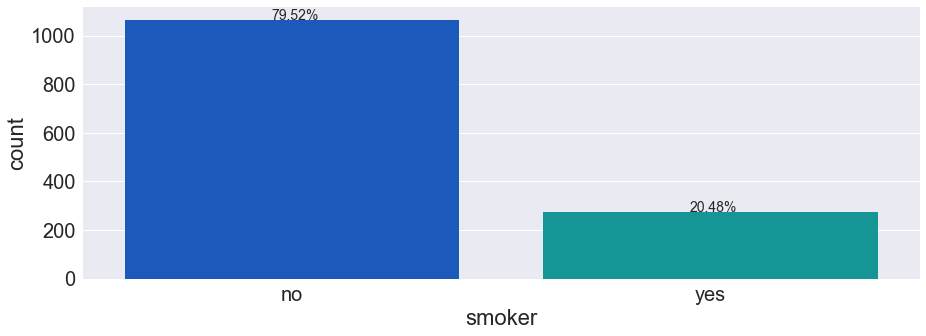

In [16]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["smoker"],palette='winter')
perc_on_bar(ax,df["smoker"])

** Obversations: **
1. Nearly 80% of the customers do not smoke.
2. Only 20% of the customers smoke. We will check if they claim more insurance in the later statistical analysis.

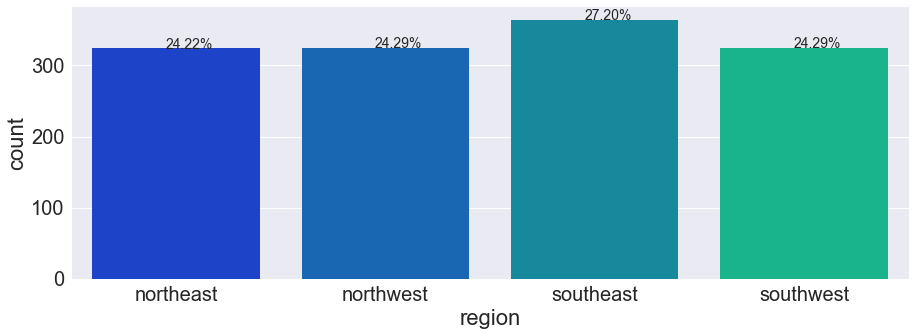

In [17]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["region"],palette='winter')
perc_on_bar(ax,df["region"])

** Obversations: **
1. There are uniform distribution of insurance holders across different regions of the US. Only southeast region does have approximately 3% more observations as compared to others

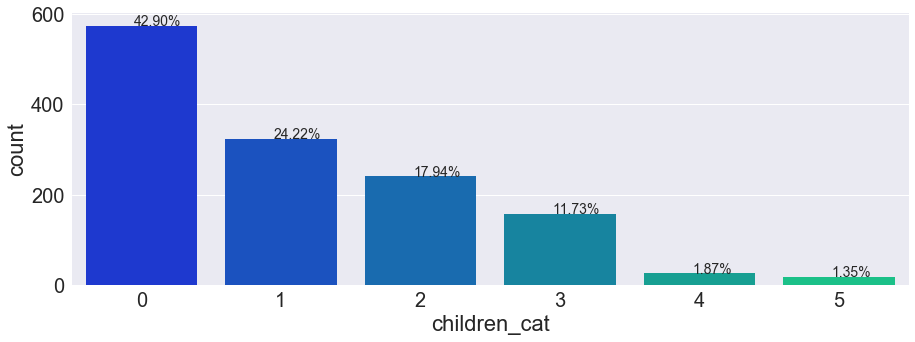

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df["children_cat"],palette='winter')
perc_on_bar(ax,df["children_cat"])

** Obversations: **
1. Nearly 43% of the policy holders do not have kid.

### Bivariate Analysis - numerical vs numerical

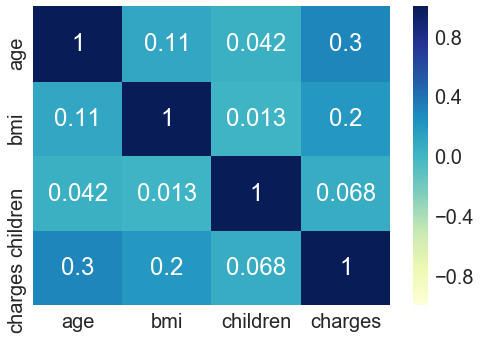

In [19]:
# Heap map correlation
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu', vmin=-1, vmax=1);
plt.show()

### Categorical vs Categorical

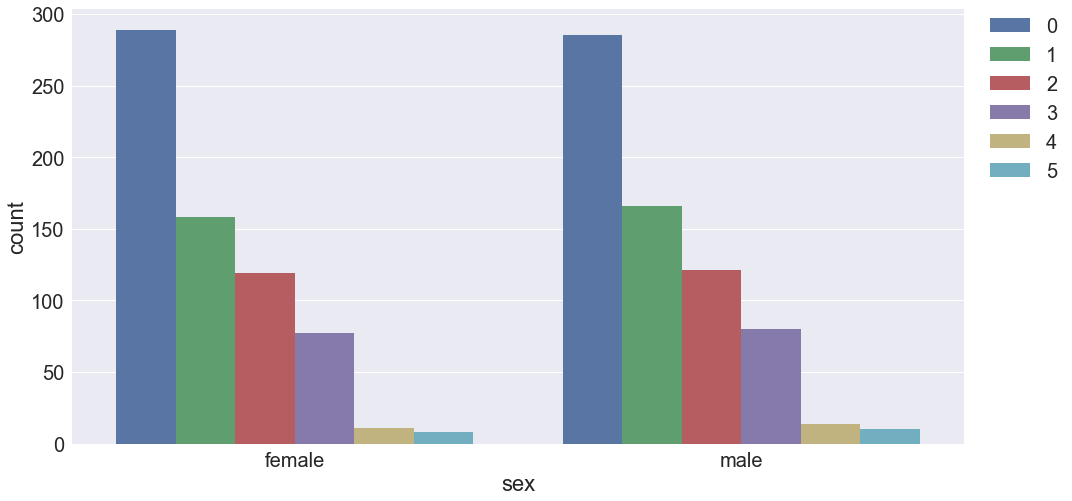

In [20]:
plt.figure(figsize=(16, 8))
sns.countplot(df['sex'],hue=df['children']);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

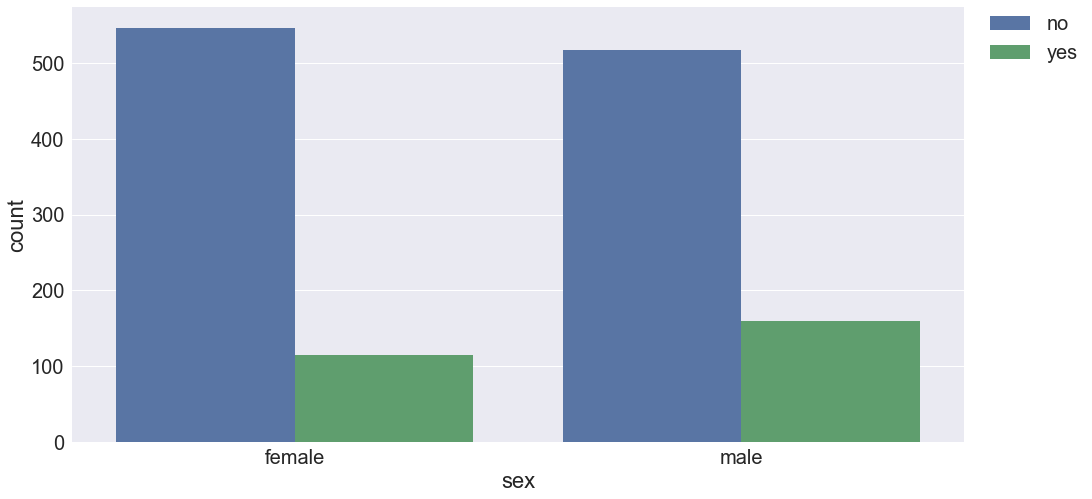

In [21]:
plt.figure(figsize=(16, 8))
sns.countplot(df['sex'],hue=df['smoker']);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

** Observations:**
1. There are more male smokers than female smokers

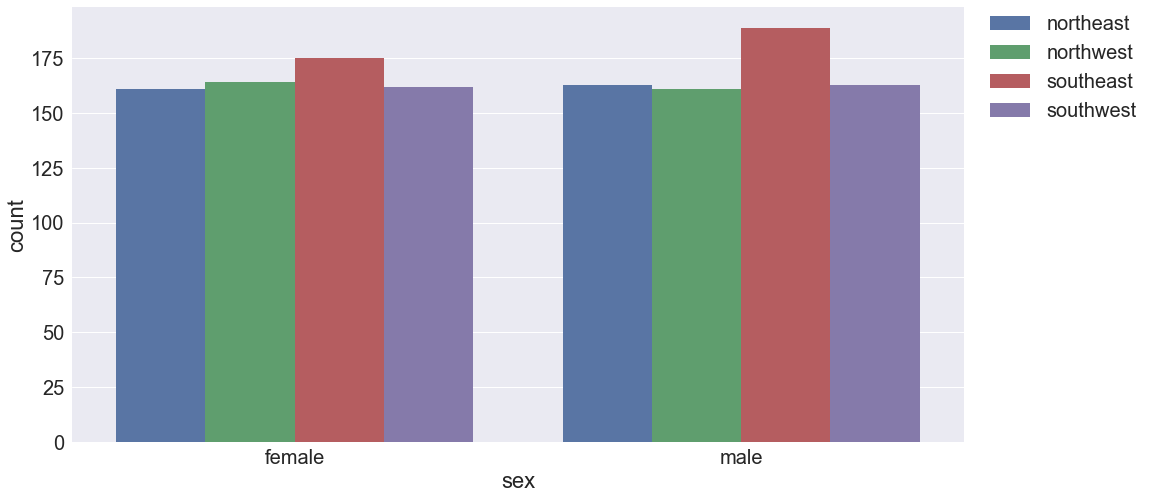

In [22]:
plt.figure(figsize=(16, 8))
sns.countplot(df['sex'],hue=df['region']);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

** Observations:**
1. There are more male in southeast region of the US.

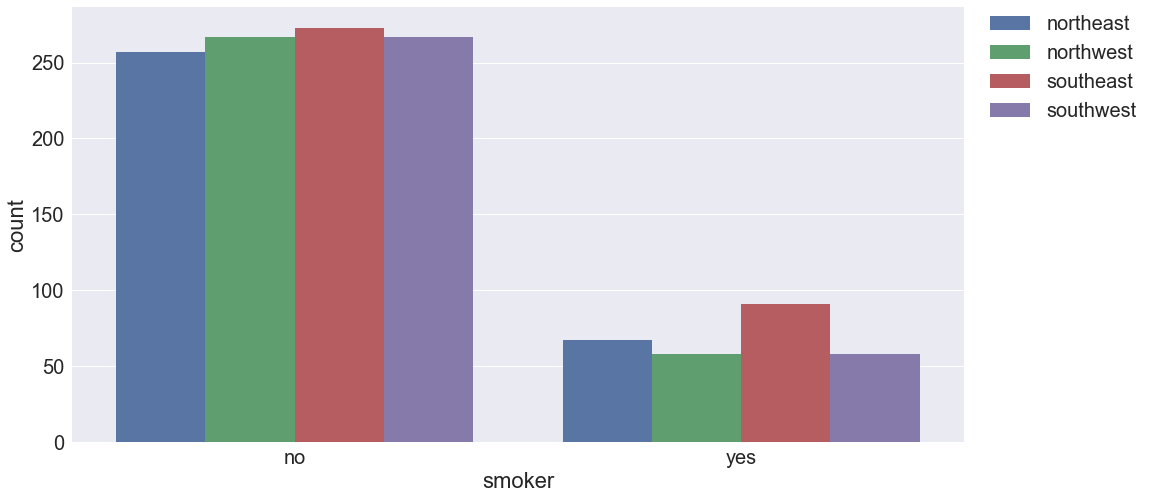

In [23]:
plt.figure(figsize=(16, 8))
sns.countplot(df['smoker'],hue=df['region']);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

** Observations:**
1. There are more smokers in southeast region of the US.

## One numerical vs Two categorical  data

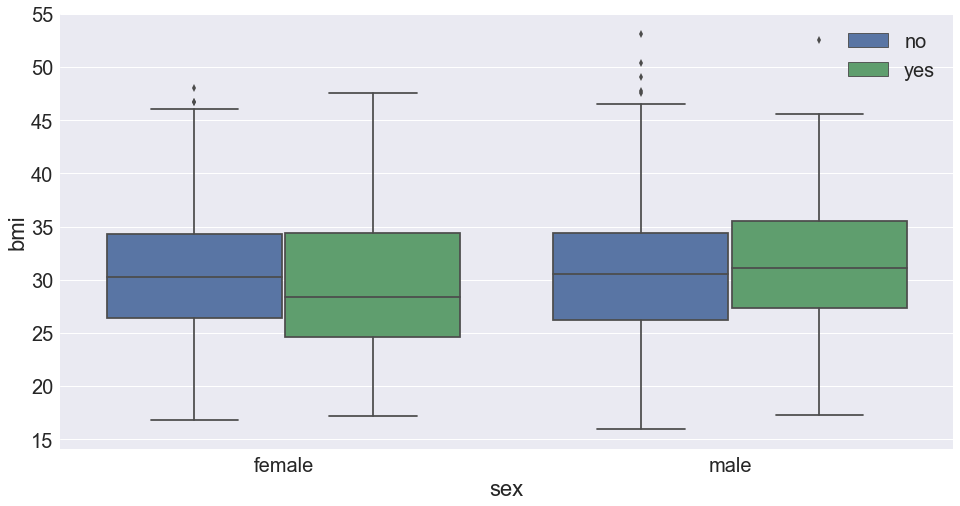

In [24]:
plt.figure(figsize=(16, 8))
sns.boxplot(df['sex'],df['bmi'],hue=df['smoker'])
plt.legend(loc='upper right')
plt.show()

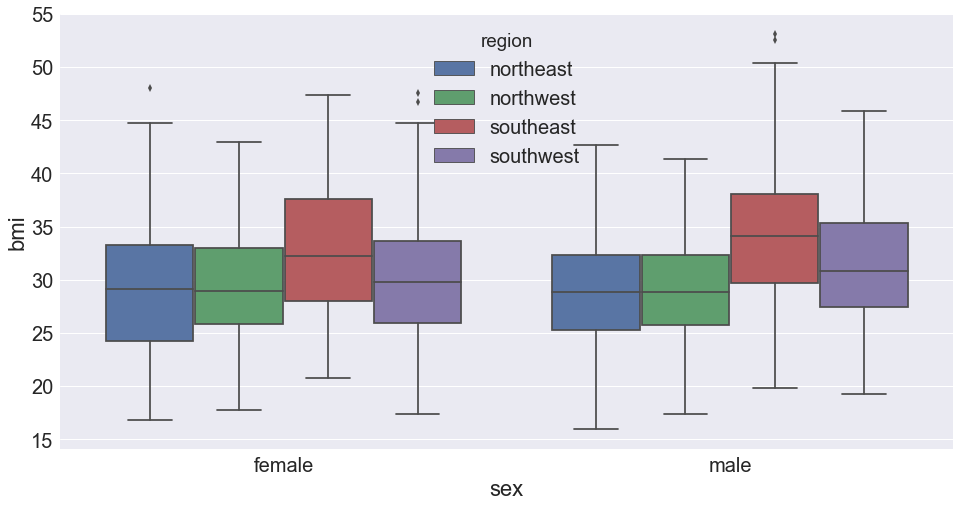

In [25]:
plt.figure(figsize=(16, 8))
sns.boxplot(df['sex'],df['bmi'],hue=df['region'])
plt.show()

** Observations:**
1. Southeast has the highest BMI among all the region

## Two numerical vs one categorical data

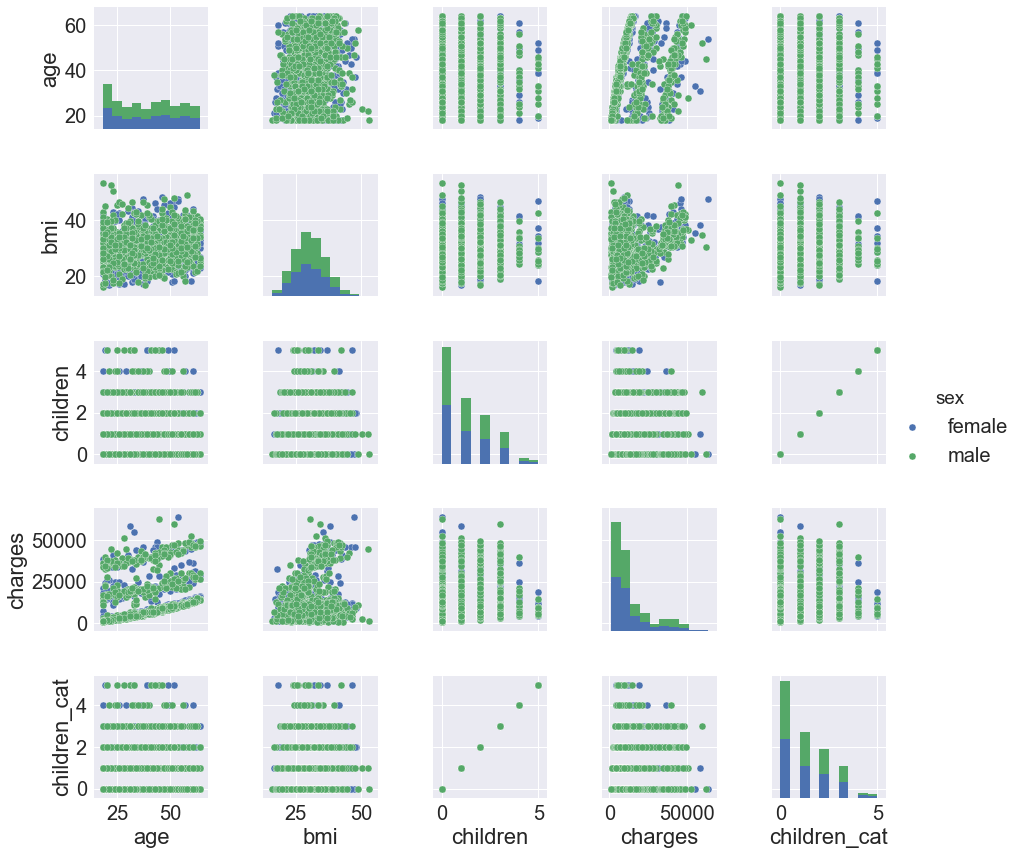

In [26]:
sns.pairplot(df,hue='sex')
plt.show()

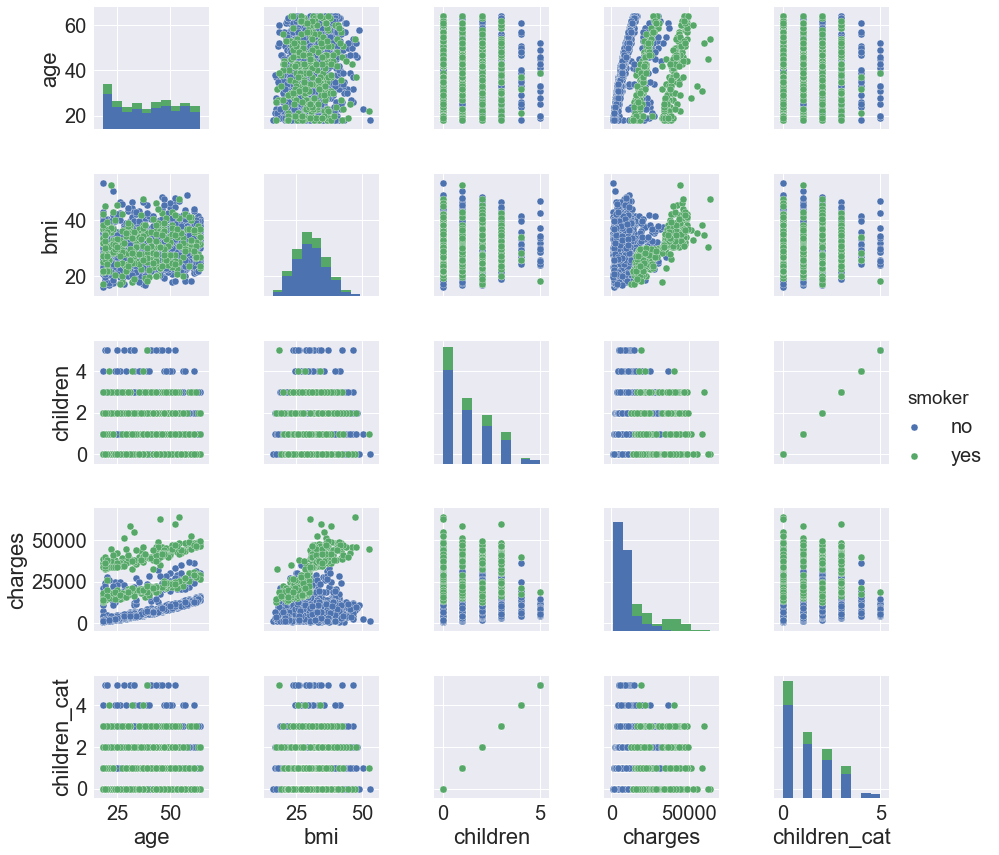

In [27]:
sns.pairplot(df,hue='smoker')
plt.show()

** Observations:**
1. BMI and charges are positively correlated for the smokers.

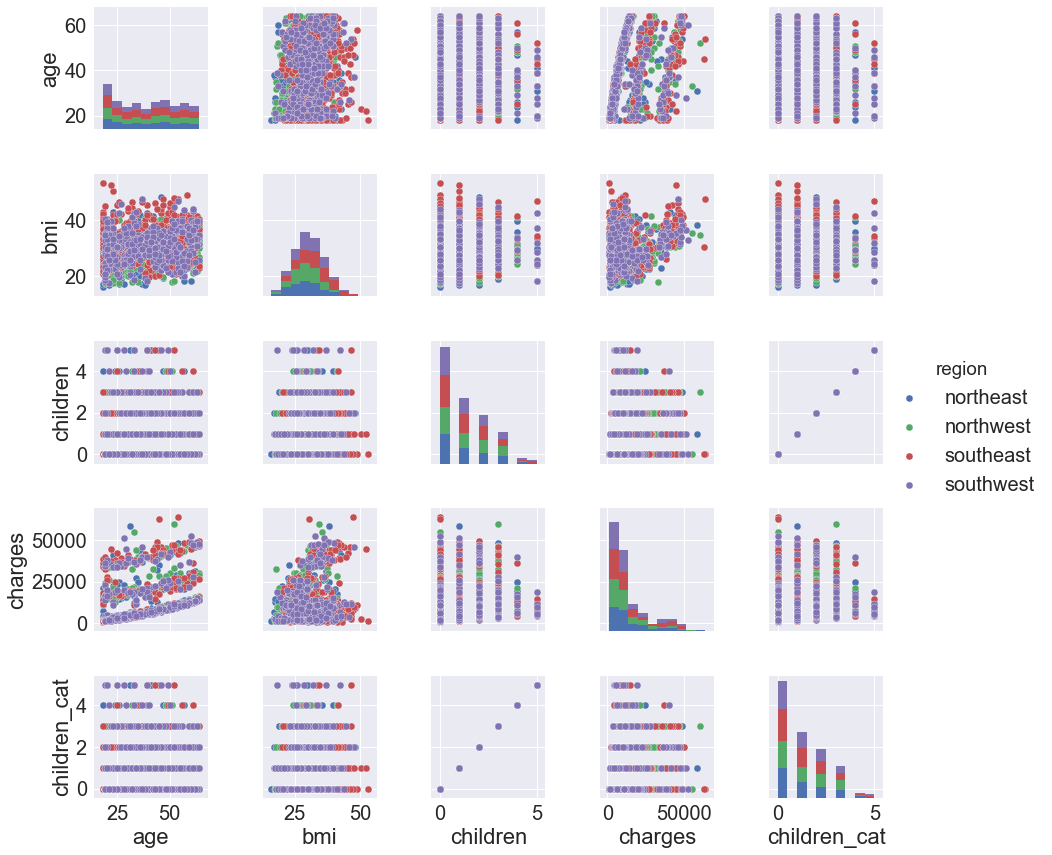

In [28]:
sns.pairplot(df,hue='region')
plt.show()

## 4. Statistical Analysis
### 4.1 Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? [Hint- Formulate a hypothesis and prove/disprove it]

**Define null and alternative hypothesis**
- Ho = $\mu_{smoker} - \mu_{non_smoker} <= 0$      (Smoker did not make more medical claims more than the non-smoker)

- Ha = $\mu_{smoker} - \mu_{non_smoker} > 0$      (Smoker made more medical claims than the non-smoker)

In [29]:
Ho = "Smoker did not make more medical claims more than the non-smoker" 
Ha = "Smoker made more medical claims than the non-smoker"

**Decide the significance level** 
- α= 0.05

**Identify the test:**
- This is a two-sample, t - test

In [30]:
from scipy.stats import ttest_ind

In [31]:
# count how many people are smokers and non smokers
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [32]:
# Calculate the average charges for smokers and non smokers
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

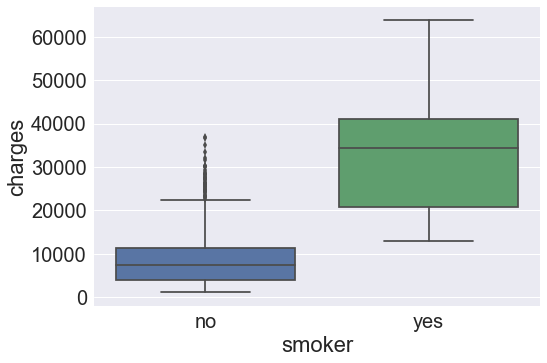

In [33]:
sns.boxplot(x="smoker", y="charges", data=df)

In [34]:
smoker=df.loc[df.iloc[:,4]=='yes','charges']
non_smoker=df.loc[df.iloc[:,4]=='no','charges']

In [35]:
t_statistic, p_value = ttest_ind(smoker, non_smoker)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


In [36]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Smoker made more medical claims than the non-smoker as the p_value (8.271435842177219e-283) < 0.05


**Observation**
- We have the statistical evidence that smokers charges more medical bills than the claims the non-smokers.

In [37]:
# using ANOVA to check if we get the same result as t-test
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm 

In [38]:
formula = 'charges ~ C(smoker)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)
import warnings
warnings.filterwarnings('ignore')

               df        sum_sq       mean_sq            F         PR(>F)
C(smoker)     1.0  1.215199e+11  1.215199e+11  2177.614868  8.271436e-283
Residual   1336.0  7.455432e+10  5.580413e+07          NaN            NaN


/Users/shuhsienwu/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/shuhsienwu/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/shuhsienwu/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


#### Observations:
1. Using ANOVA give us the same p-value as t-test
2. p-value is smaller than the defined significant level so we reject the null hypothesis
3. There is significant difference in charges depends on if one is the smoker or non-smoker

### 4.2 Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

** Define null and alternative hypothesis**
- Ho = $\mu_{female} - \mu_{male} = 0$      (Female BMI is the same as male BMI)

- Ha = $\mu_{female} - \mu_{male} != 0$      (Female BMI is different than male BMI)

**Decide the significance level** 
- α= 0.05

**Identify the test:**
- This is a two-sample, t - test

In [39]:
Ho = "Females BMI is same as Males BMI"  
Ha = "Females BMI is different from Males BMI"  

In [40]:
#Calculate the average bmi for female and male
df.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

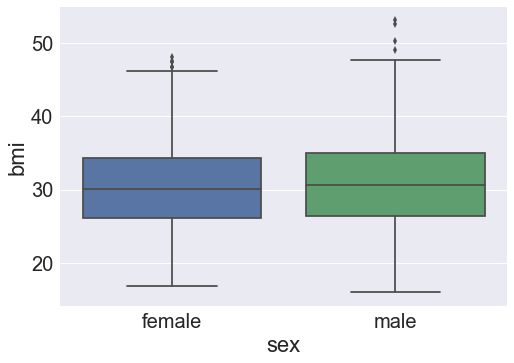

In [41]:
sns.boxplot('sex','bmi',data=df)

In [42]:
female=df.loc[df.loc[:,'sex']=='female','bmi']
male=df.loc[df.loc[:,'sex']=='male','bmi']

In [43]:
t_statistic, p_value = ttest_ind(female, male)
print(t_statistic, p_value)

-1.696752635752224 0.08997637178984932


In [44]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Females BMI is same as Males BMI as the p_value (0.08997637178984932) > 0.05


#### Observations:
1. p-value is 0.089> 0.05 so we fail to reject the null hypothesis
2. Being a female or male has no impact of the BMI

### 4.3 Is the proportion of smokers significantly different across different regions? [Hint : Create a contingency table/cross tab, Use the function : stats.chi2_contingency()]

**Define null and alternative hypothesis**
- $H_0$: the proportion of smokers is the same across different regions
                        
- $H_a$: the proportion of smoker is different across different regions

** Decide the significance level **
- α= 0.05

**Identify the test**
- Since we have observed frequencies of smoker across different regions, we can calculate the expected frequencies. So we use chi-square goodness of fit for this problem.

In [45]:
H0='the proportion of smokers is the same across different regions' 
Ha='the proportion of smoker is different across different regions'

In [46]:
from scipy import stats 

In [47]:
obs=pd.crosstab(df.loc[:,'smoker'],df.loc[:,'region'])
obs

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [48]:
chi2, p, dof, ex =stats.chi2_contingency(obs)
print(f'chi square: {chi2},\n p_value: {p},\n dof: {dof}, \n The expected frequeny: \n {ex}')
      
      #, p, dof, ex )

chi square: 7.34347776140707,
 p_value: 0.06171954839170547,
 dof: 3, 
 The expected frequeny: 
 [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]


In [49]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{H0} as the p_value ({p_value}) > 0.05')

the proportion of smokers is the same across different regions as the p_value (0.08997637178984932) > 0.05


#### Observations:
1. p-value 0.06 >0.05 so we fail to reject the null hypothesis
2. Regions have no impact on if one is smoker or non smoker

### 4.4 Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

** Define null and alternative hypothesis **
- $H_0$: the mean BMI of women are the same despite how many children she has
                        
- $H_a$: the mean BMI of women are different by how many children she has

In [50]:
Ho = "the mean BMI of women are the same despite how many children she has"   
Ha = "the mean BMI of women are different by how many children she has"   

**Decide the significance level** 
- α= 0.05

** Identify the test **
- We are testing 3 population means with one independent variable, so we are going to use one-way ANOVA

In [51]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [52]:
female_bmi=df.loc[df.loc[:,'sex']=='female','bmi']# create female BMI Series
female_children=df.loc[df.loc[:,'sex']=='female','children'] # create female children Series

In [53]:
df2=pd.concat([female_bmi, female_children], axis=1) # create DataFrame using female BMI Series and female children Series

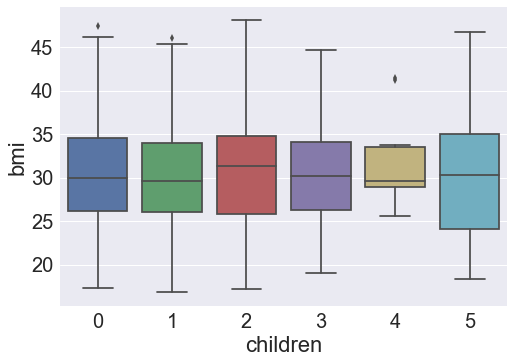

In [54]:
sns.boxplot(female_children,female_bmi,data=df2)

In [55]:
mod = ols('female_bmi ~ female_children',data=df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq     df        F    PR(>F)
female_children     11.855397    1.0  0.32399  0.569413
Residual         24150.599799  660.0      NaN       NaN


In [56]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

the mean BMI of women are the same despite how many children she has as the p_value (0.08997637178984932) > 0.05


#### Obervations:
1. p-value = 0.56 > 0.05 so we fail to reject the null hypothesis
2. Having how many children does not impact a women's BMI